<a href="https://colab.research.google.com/github/alexandrastna/AI-for-ESG/blob/main/Notebooks/5_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thesis 5 – ESG Classification of Extracted Sentences

This notebook analyzes and visualizes the results of ESG sentence classification.
It uses the file produced in Thesis 4, which contains over 200,000 classified sentences from ESG-related corporate reports and transcripts.


1 - Imports

In [ ]:
# 1. Imports and Data Loading
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📂 Load the classified ESG sentences file
path = "/content/drive/MyDrive/Thèse Master/Exports2/classified_all_sentences.csv"
df = pd.read_csv(path)

# ✅ Basic check
print("✅ Data loaded:", df.shape)
display(df.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Données chargées : (201247, 11)


,company,year,document_type,sentence,label_env,score_env,label_soc,score_soc,label_gov,score_gov,label_dominant
0,ABB Ltd,2023,Integrated Report,ABB’s purpose is to enable a more sustainable...,environmental,0.997645,none,0.999854,none,0.992436,environmental
1,ABB Ltd,2023,Integrated Report,"Building on over 140 years of excel­ lence, ou...",none,0.980388,none,0.721091,none,0.991456,none
2,ABB Ltd,2023,Integrated Report,"Together, we address the world’s energy chall...",environmental,0.997678,none,0.998415,none,0.988323,environmental
3,ABB Ltd,2023,Integrated Report,Our solutions connect engineer­,none,0.977996,none,0.999940,none,0.994368,none
4,ABB Ltd,2023,Integrated Report,ing know-how and software to opti­ mize how th...,none,0.992756,none,0.999876,none,0.988930,none
5,ABB Ltd,2023,Integrated Report,ABB’s purpose is why we are in business and o...,none,0.993010,none,0.923896,none,0.995786,none
6,ABB Ltd,2023,Integrated Report,We enable a more sustainable and resource-eff...,environmental,0.997680,none,0.999884,none,0.996268,environmental
7,ABB Ltd,2023,Integrated Report,Creating success Leading with technology Addr...,environmental,0.997123,none,0.999907,none,0.991568,environmental
8,ABB Ltd,2023,Integrated Report,To enable ABB to deliver on its purpose and cr...,none,0.993533,none,0.922722,none,0.996183,none
9,ABB Ltd,2023,Integrated Report,Our 19 divisions are organized into four busi...,none,0.994484,none,0.999906,none,0.997363,none


2 - Overall Distribution of ESG Labels (E, S, G, none)

In [ ]:
# Number of Sentences per ESG Pillar with Confidence Threshold > 0.9

# 🧮 Count how many ESG pillars each sentence is confidently classified into
def count_classifications(row):
    e = row['label_env'] == 'environmental' and row['score_env'] > 0.9
    s = row['label_soc'] == 'social' and row['score_soc'] > 0.9
    g = row['label_gov'] == 'governance' and row['score_gov'] > 0.9
    total = sum([e, s, g])
    if total == 0:
        return 'none'
    elif total == 1:
        if e: return 'E'
        if s: return 'S'
        if g: return 'G'
    elif total == 2:
        return 'multi (2)'
    else:
        return 'multi (3)'

df['classification_type'] = df.apply(count_classifications, axis=1)

# 🔢 Count occurrences by classification type
type_counts = df['classification_type'].value_counts().sort_index()
display(type_counts)


,count
classification_type,
E,20449
G,3276
S,10773
multi (2),6406
multi (3),1398
none,158945


2bis - Clear Visualization of classification_type distribution

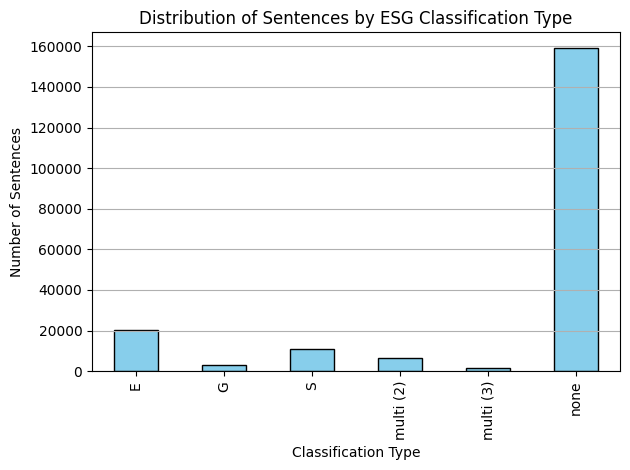

In [ ]:
import matplotlib.pyplot as plt

# 🎨 Barplot of classification type distribution
type_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Sentences by ESG Classification Type")
plt.xlabel("Classification Type")
plt.ylabel("Number of Sentences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



3 — Analysis by company, year, and document type

In [ ]:
#Cross-Analysis
pivot_company = df.pivot_table(index='company', columns='classification_type', aggfunc='size', fill_value=0)
pivot_year = df.pivot_table(index='year', columns='classification_type', aggfunc='size', fill_value=0)
pivot_doc = df.pivot_table(index='document_type', columns='classification_type', aggfunc='size', fill_value=0)

print("📊 Par entreprise")
display(pivot_company)

print("📆 Par année")
display(pivot_year)

print("📄 Par type de document")
display(pivot_doc)


📊 Par entreprise


classification_type,E,G,S,multi (2),multi (3),none
company,,,,,,
ABB Ltd,2210,197,1091,597,57,10889
Compagnie Financière Richemont,1189,303,1420,725,209,13841
Holcim Ltd,3964,287,714,451,41,11853
Lonza Group AG,1052,253,820,467,131,9976
Nestlé SA,2249,189,1920,758,76,19735
Novartis AG,516,326,617,236,123,20995
Roche Holding AG,375,99,894,282,16,13278
Swiss Re Ltd,3458,462,1019,942,245,18537
UBS Group AG,3461,643,1365,1113,235,24400


📆 Par année


classification_type,E,G,S,multi (2),multi (3),none
year,,,,,,
2021,5899,1084,3769,2144,473,52520
2022,6476,1083,3233,1976,388,49865
2023,8074,1109,3771,2286,537,56560


📄 Par type de document


classification_type,E,G,S,multi (2),multi (3),none
document_type,,,,,,
Annual Report,5393,2346,3476,2209,605,63619
Earnings Call Transcript,1293,10,1015,328,93,60854
Governance Report,62,197,66,69,7,2635
Half-Year Report,260,34,68,54,11,10571
Integrated Report,3327,337,1153,647,81,9514
Sustainability Report,10114,352,4995,3099,601,11752


In [ ]:
# 3 — Cross-tabulation with total
pivot_company = df.pivot_table(index='company', columns='classification_type', aggfunc='size', fill_value=0)
pivot_company["Total"] = pivot_company.sum(axis=1)

pivot_year = df.pivot_table(index='year', columns='classification_type', aggfunc='size', fill_value=0)
pivot_year["Total"] = pivot_year.sum(axis=1)

pivot_doc = df.pivot_table(index='document_type', columns='classification_type', aggfunc='size', fill_value=0)
pivot_doc["Total"] = pivot_doc.sum(axis=1)

print("📊 Par entreprise")
display(pivot_company)

print("📆 Par année")
display(pivot_year)

print("📄 Par type de document")
display(pivot_doc)


📊 Par entreprise


classification_type,E,G,S,multi (2),multi (3),none,Total
company,,,,,,,
ABB Ltd,2210,197,1091,597,57,10889,15041
Compagnie Financière Richemont,1189,303,1420,725,209,13841,17687
Holcim Ltd,3964,287,714,451,41,11853,17310
Lonza Group AG,1052,253,820,467,131,9976,12699
Nestlé SA,2249,189,1920,758,76,19735,24927
Novartis AG,516,326,617,236,123,20995,22813
Roche Holding AG,375,99,894,282,16,13278,14944
Swiss Re Ltd,3458,462,1019,942,245,18537,24663
UBS Group AG,3461,643,1365,1113,235,24400,31217


📆 Par année


classification_type,E,G,S,multi (2),multi (3),none,Total
year,,,,,,,
2021,5899,1084,3769,2144,473,52520,65889
2022,6476,1083,3233,1976,388,49865,63021
2023,8074,1109,3771,2286,537,56560,72337


📄 Par type de document


classification_type,E,G,S,multi (2),multi (3),none,Total
document_type,,,,,,,
Annual Report,5393,2346,3476,2209,605,63619,77648
Earnings Call Transcript,1293,10,1015,328,93,60854,63593
Governance Report,62,197,66,69,7,2635,3036
Half-Year Report,260,34,68,54,11,10571,10998
Integrated Report,3327,337,1153,647,81,9514,15059
Sustainability Report,10114,352,4995,3099,601,11752,30913


3bis – Useful visualizations

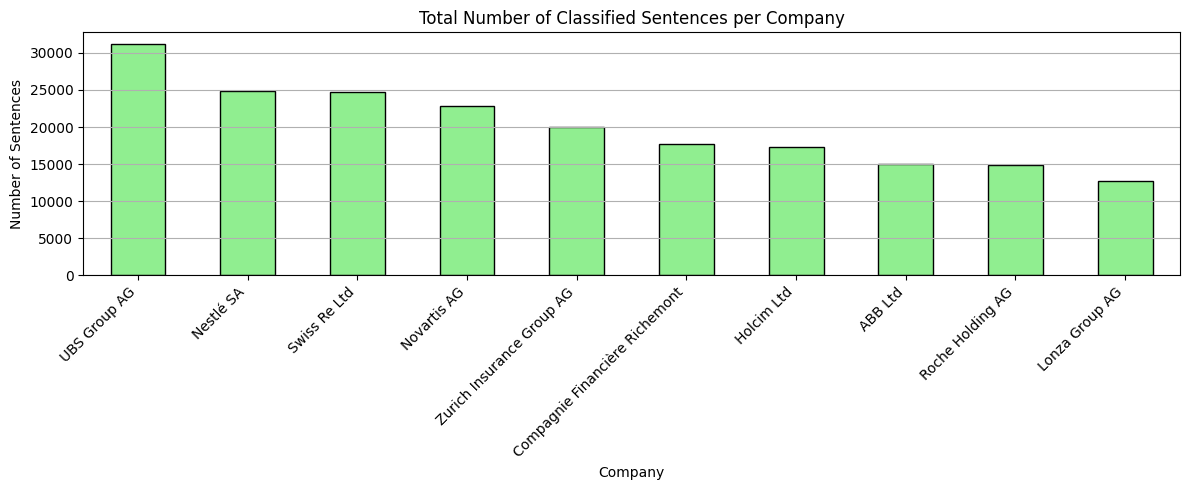

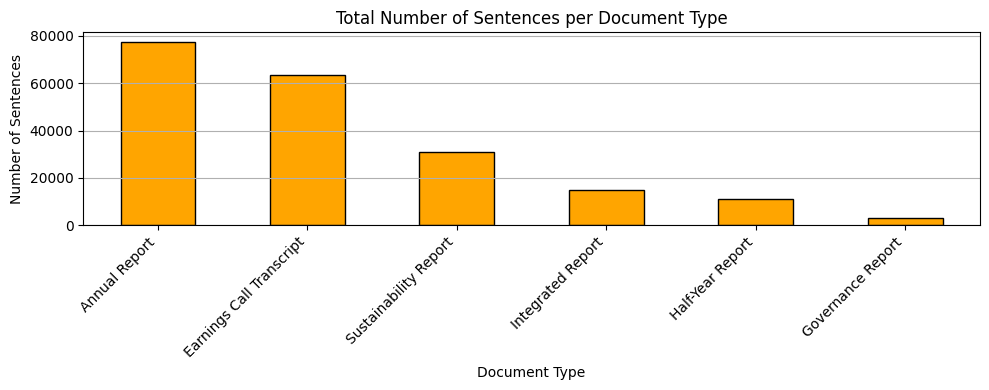

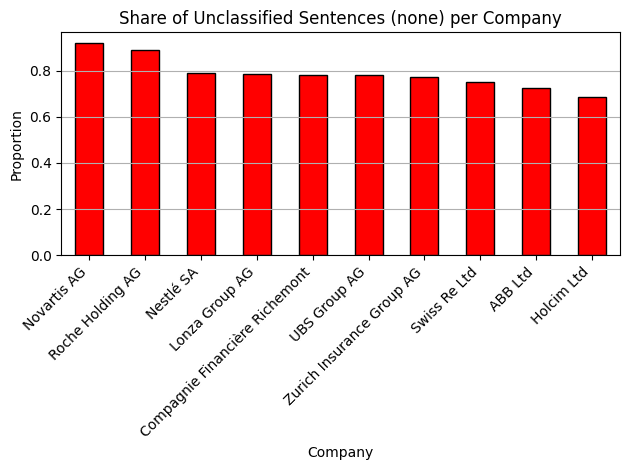

In [ ]:
# 📈 Plot by company
pivot_company["Total"].sort_values(ascending=False).plot(kind="bar", figsize=(12,5), color="lightgreen", edgecolor="black")
plt.title("Total Number of Classified Sentences per Company")
plt.ylabel("Number of Sentences")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 📊 Plot by document type
pivot_doc["Total"].sort_values(ascending=False).plot(kind="bar", figsize=(10,4), color="orange", edgecolor="black")
plt.title("Total Number of Sentences per Document Type")
plt.ylabel("Number of Sentences")
plt.xlabel("Document Type")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 💡 Insight: Share of "none" by company
share_none = pivot_company["none"] / pivot_company["Total"]
share_none.sort_values(ascending=False).plot(kind="bar", color="red", edgecolor="black")
plt.title("Share of Unclassified Sentences (none) per Company")
plt.ylabel("Proportion")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



classification_type,E,G,S,total,ratio_E,ratio_S,ratio_G
company,,,,,,,
ABB Ltd,2210,197,1091,3498,0.631790,0.311893,0.056318
Compagnie Financière Richemont,1189,303,1420,2912,0.408310,0.487637,0.104052
Holcim Ltd,3964,287,714,4965,0.798389,0.143807,0.057805
Lonza Group AG,1052,253,820,2125,0.495059,0.385882,0.119059
Nestlé SA,2249,189,1920,4358,0.516062,0.440569,0.043369
Novartis AG,516,326,617,1459,0.353667,0.422892,0.223441
Roche Holding AG,375,99,894,1368,0.274123,0.653509,0.072368
Swiss Re Ltd,3458,462,1019,4939,0.700142,0.206317,0.093541
UBS Group AG,3461,643,1365,5469,0.632840,0.249589,0.117572


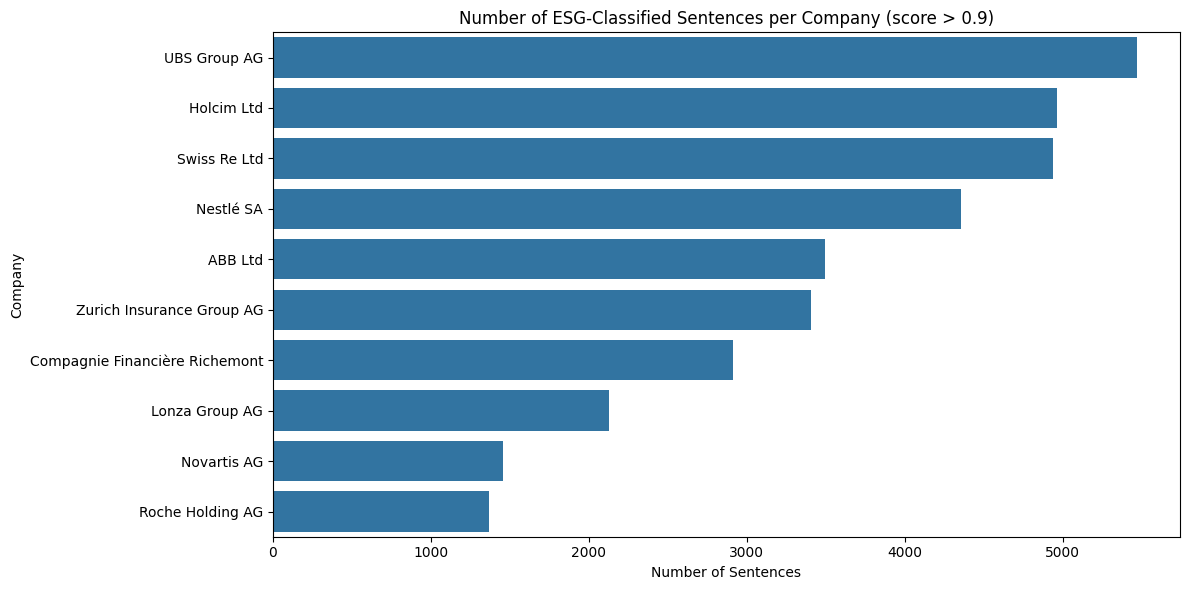

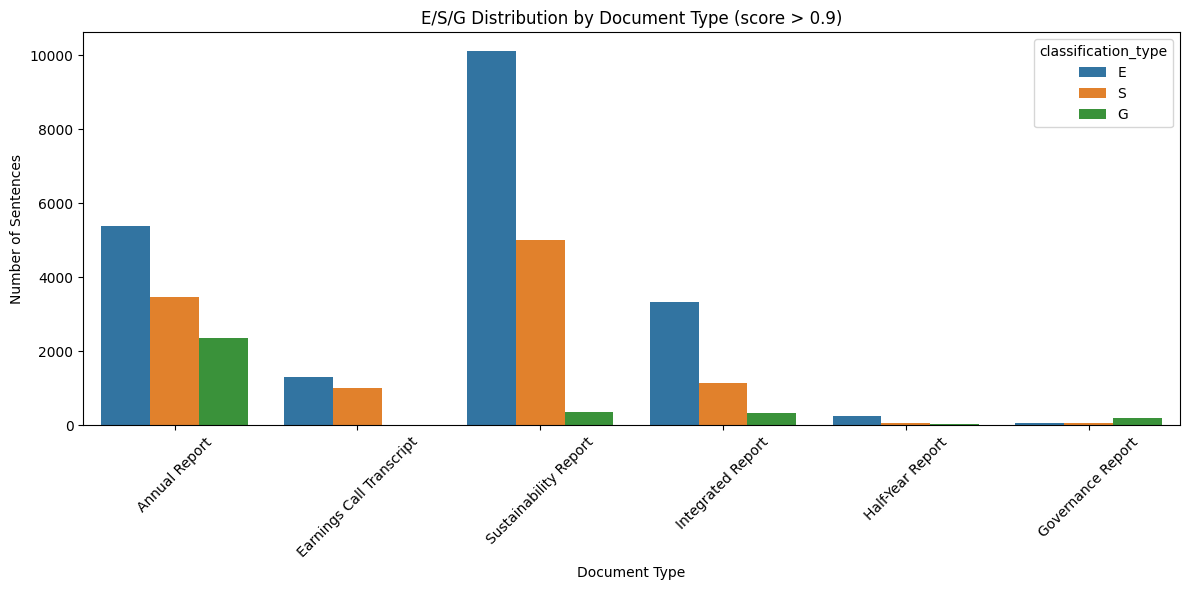

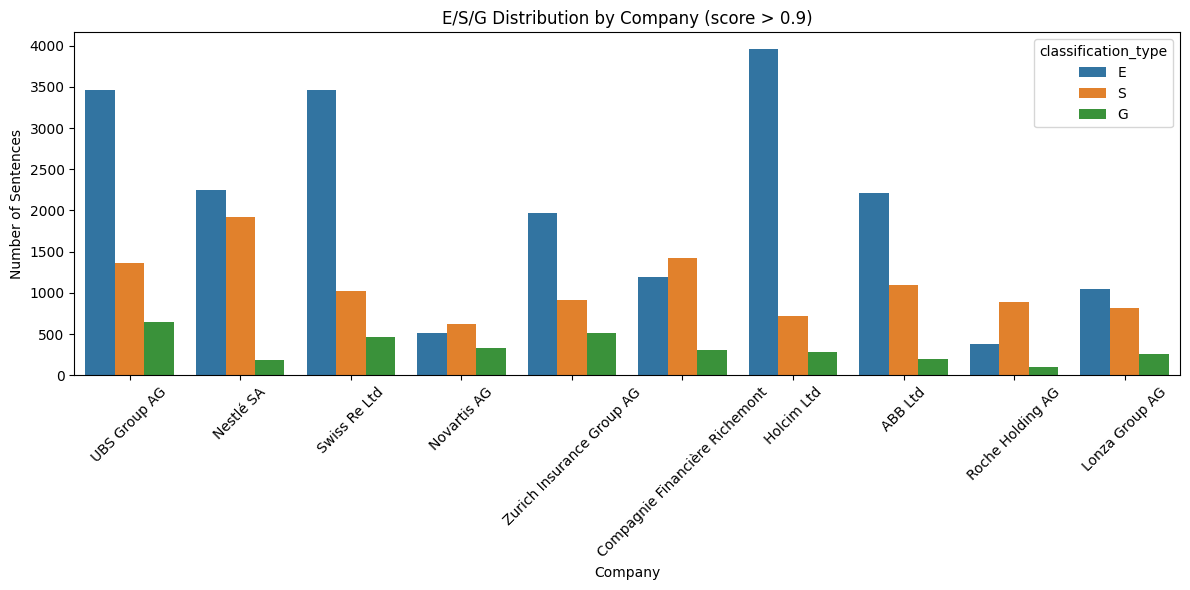

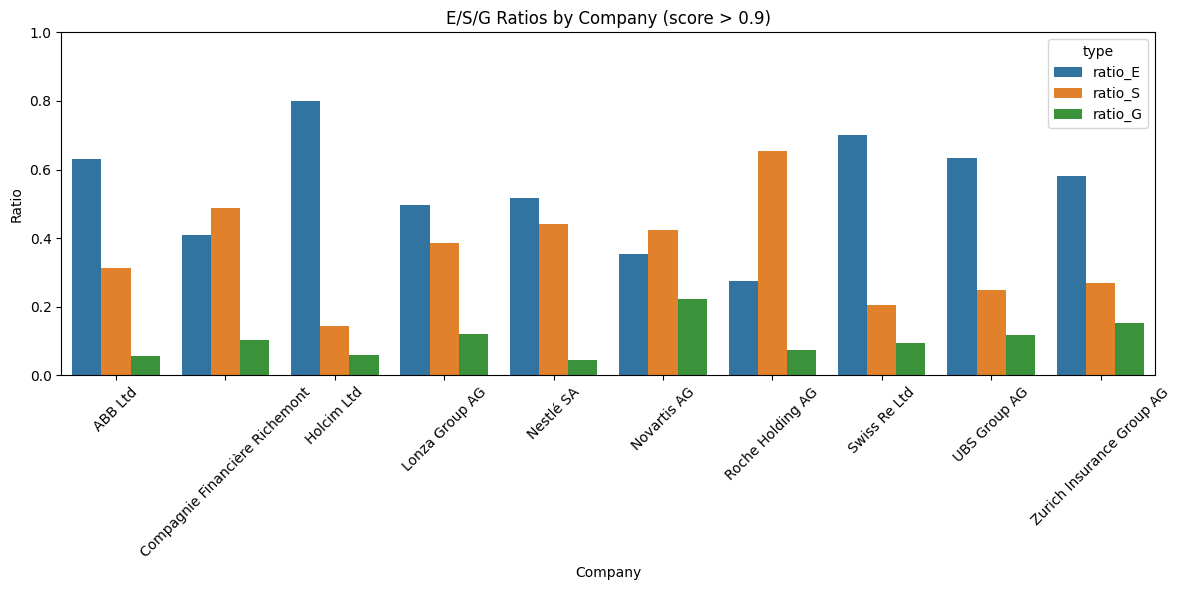

/tmp/ipython-input-14-148386831.py:92: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


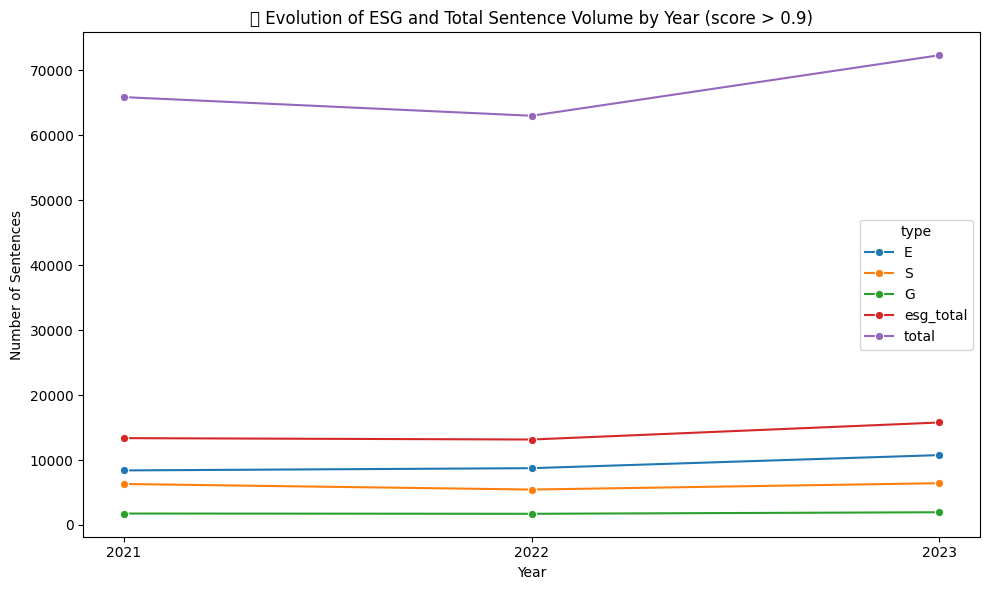

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. Add E/S/G ratios per company (excluding "none") with score > 0.9
df_filtered = df[
    ((df["label_env"] == "environmental") & (df["score_env"] > 0.9)) |
    ((df["label_soc"] == "social") & (df["score_soc"] > 0.9)) |
    ((df["label_gov"] == "governance") & (df["score_gov"] > 0.9))
].copy()

df_filtered = df_filtered[df_filtered["classification_type"].isin(["E", "S", "G"])]
count_by_company = df_filtered.groupby(["company", "classification_type"]).size().unstack(fill_value=0)
count_by_company["total"] = count_by_company.sum(axis=1)

for cat in ["E", "S", "G"]:
    count_by_company[f"ratio_{cat}"] = count_by_company[cat] / count_by_company["total"]

display(count_by_company.head(10))

# ✅ 2. Plot: Number of classified ESG sentences per company
plt.figure(figsize=(12, 6))
df_classified = df_filtered[df_filtered["classification_type"] != "none"]
sns.countplot(data=df_classified, y="company", order=df_classified["company"].value_counts().index)
plt.title("Number of ESG-Classified Sentences per Company (score > 0.9)")
plt.xlabel("Number of Sentences")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# ✅ 3. Plot: E/S/G distribution by document type
plt.figure(figsize=(12, 6))
sns.countplot(data=df_classified, x="document_type", hue="classification_type",
              order=df["document_type"].value_counts().index,
              hue_order=["E", "S", "G"])
plt.title("E/S/G Distribution by Document Type (score > 0.9)")
plt.xlabel("Document Type")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 4. Plot: E/S/G distribution by company
plt.figure(figsize=(12, 6))
sns.countplot(data=df_classified, x="company", hue="classification_type",
              order=df["company"].value_counts().index,
              hue_order=["E", "S", "G"])
plt.title("E/S/G Distribution by Company (score > 0.9)")
plt.xlabel("Company")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 5. Plot: E/S/G Ratios by Company
ratios_melted = count_by_company[[f"ratio_E", f"ratio_S", f"ratio_G"]].reset_index().melt(id_vars="company",
                                                                                          var_name="type",
                                                                                          value_name="ratio")
plt.figure(figsize=(12, 6))
sns.barplot(data=ratios_melted, x="company", y="ratio", hue="type")
plt.title("E/S/G Ratios by Company (score > 0.9)")
plt.xlabel("Company")
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# ✅ 6. Plot: Temporal evolution of E/S/G and total volumes
df["is_esg"] = (
    ((df["label_env"] == "environmental") & (df["score_env"] > 0.9)) |
    ((df["label_soc"] == "social") & (df["score_soc"] > 0.9)) |
    ((df["label_gov"] == "governance") & (df["score_gov"] > 0.9))
)

time_stats = df.groupby("year").agg(
    total=("sentence", "count"),
    esg_total=("is_esg", "sum"),
    E=("label_env", lambda x: ((x == "environmental") & (df.loc[x.index, "score_env"] > 0.9)).sum()),
    S=("label_soc", lambda x: ((x == "social") & (df.loc[x.index, "score_soc"] > 0.9)).sum()),
    G=("label_gov", lambda x: ((x == "governance") & (df.loc[x.index, "score_gov"] > 0.9)).sum())
).reset_index()

time_stats_melted = time_stats.melt(id_vars="year", value_vars=["E", "S", "G", "esg_total", "total"],
                                    var_name="type", value_name="count")

plt.figure(figsize=(10, 6))
sns.lineplot(data=time_stats_melted, x="year", y="count", hue="type", marker="o")
plt.title("📈 Evolution of ESG and Total Sentence Volume by Year (score > 0.9)")
plt.xlabel("Year")
plt.ylabel("Number of Sentences")
plt.xticks(time_stats["year"].unique())
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-2541324874.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


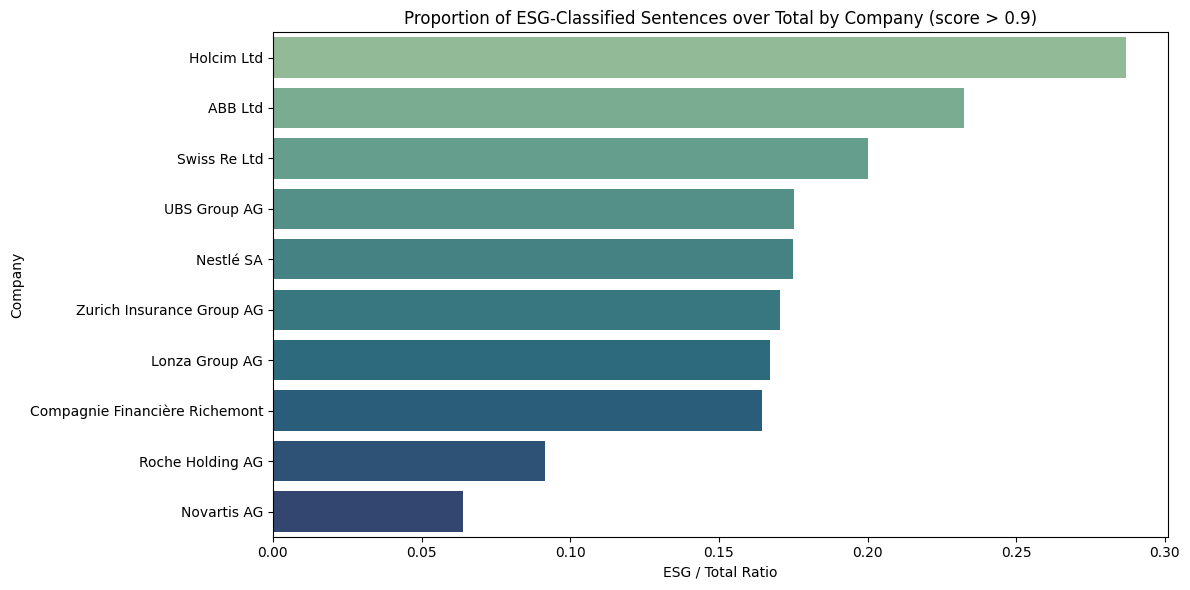

,total_phrases_all,total_esg,ratio_all_esg_on_total,ratio_E_on_total,ratio_S_on_total,ratio_G_on_total
company,,,,,,
Holcim Ltd,17310,4965,0.286828,0.229001,0.041248,0.016580
ABB Ltd,15041,3498,0.232564,0.146932,0.072535,0.013098
Swiss Re Ltd,24663,4939,0.200259,0.140210,0.041317,0.018733
UBS Group AG,31217,5469,0.175193,0.110869,0.043726,0.020598
Nestlé SA,24927,4358,0.174831,0.090223,0.077025,0.007582
Zurich Insurance Group AG,19946,3405,0.170711,0.099017,0.045774,0.025920
Lonza Group AG,12699,2125,0.167336,0.082841,0.064572,0.019923
Compagnie Financière Richemont,17687,2912,0.164641,0.067225,0.080285,0.017131
Roche Holding AG,14944,1368,0.091542,0.025094,0.059823,0.006625


In [ ]:
# 3bisbisbis. ADDITIONAL ANALYSIS ON ESG / TOTAL RATIOS

# ✅ Compute total number of sentences (ESG + none) per company
total_sentences = df.groupby("company").size().rename("total_phrases_all")

# ✅ Filter for ESG-classified sentences with score > 0.9
df_esg = df[
    ((df["label_env"] == "environmental") & (df["score_env"] > 0.9)) |
    ((df["label_soc"] == "social") & (df["score_soc"] > 0.9)) |
    ((df["label_gov"] == "governance") & (df["score_gov"] > 0.9))
].copy()
df_esg = df_esg[df_esg["classification_type"].isin(["E", "S", "G"])]

# ✅ Count ESG-classified sentences by company and type
count_by_company = df_esg.groupby(["company", "classification_type"]).size().unstack(fill_value=0)

# ✅ Ensure all ESG columns exist
for col in ["E", "S", "G"]:
    if col not in count_by_company.columns:
        count_by_company[col] = 0

# ✅ Compute total ESG-classified sentences
count_by_company["total_esg"] = count_by_company[["E", "S", "G"]].sum(axis=1)

# ✅ Merge with total sentence count (all types including "none")
count_by_company = count_by_company.merge(total_sentences, on="company")

# ✅ Compute ESG type ratios over ESG total
for cat in ["E", "S", "G"]:
    count_by_company[f"ratio_{cat}_on_esg"] = count_by_company[cat] / count_by_company["total_esg"]

# ✅ Compute ESG type ratios over all sentences
for cat in ["E", "S", "G"]:
    count_by_company[f"ratio_{cat}_on_total"] = count_by_company[cat] / count_by_company["total_phrases_all"]

# ✅ Compute global ESG ratio on all sentences
count_by_company["ratio_all_esg_on_total"] = count_by_company["total_esg"] / count_by_company["total_phrases_all"]

# ✅ Visualization: Companies talking the most about ESG (relative to all their content)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=count_by_company.sort_values("ratio_all_esg_on_total", ascending=False),
    x="ratio_all_esg_on_total",
    y="company",
    palette="crest"
)
plt.title("Proportion of ESG-Classified Sentences over Total by Company (score > 0.9)")
plt.xlabel("ESG / Total Ratio")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# 👉 Optional: Table preview
count_by_company[[
    "total_phrases_all", "total_esg", "ratio_all_esg_on_total",
    "ratio_E_on_total", "ratio_S_on_total", "ratio_G_on_total"
]].sort_values("ratio_all_esg_on_total", ascending=False).head(10)


### On the dominant label assigned :

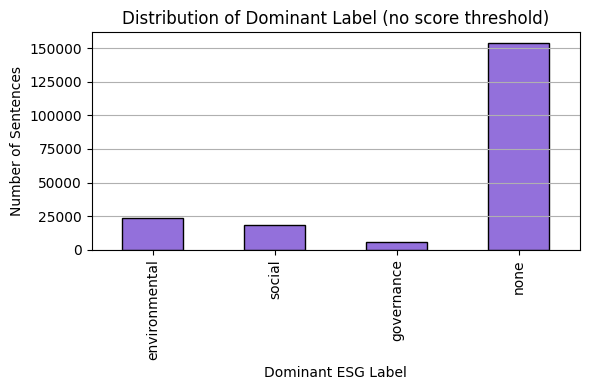

In [ ]:
# Overall distribution of dominant labels
plt.figure(figsize=(6, 4))
df["label_dominant"].value_counts().reindex(["environmental", "social", "governance", "none"]).plot(
    kind="bar", color="mediumpurple", edgecolor="black"
)
plt.title("Distribution of Dominant Label (no score threshold)")
plt.xlabel("Dominant ESG Label")
plt.ylabel("Number of Sentences")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


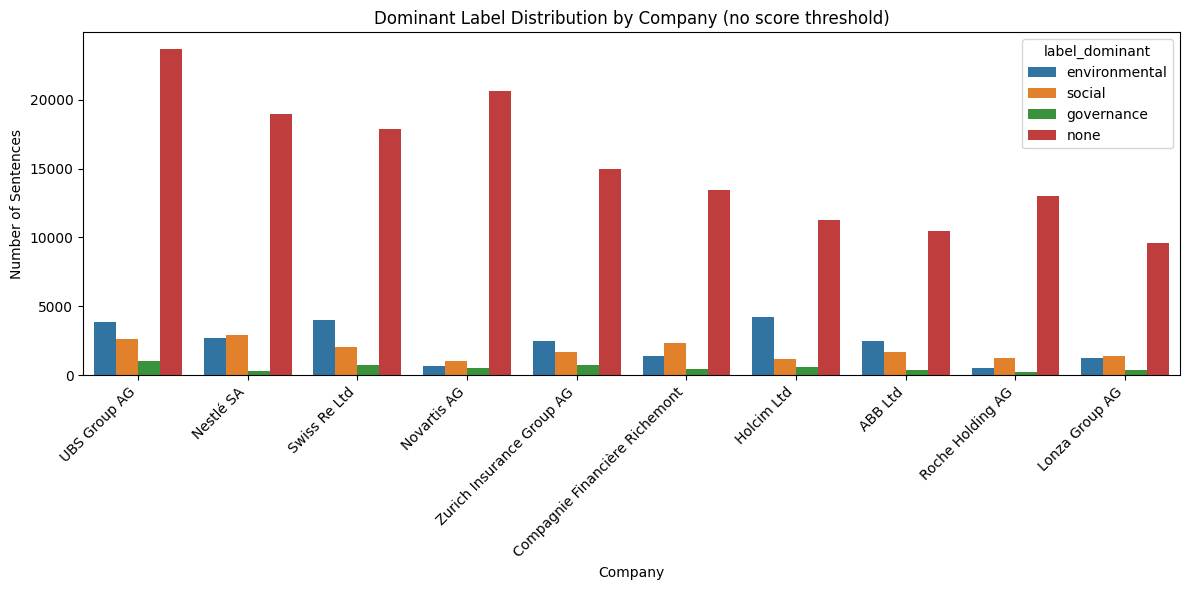

In [ ]:
# Number of sentences by dominant label and by company
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="company", hue="label_dominant",
              hue_order=["environmental", "social", "governance", "none"],
              order=df["company"].value_counts().index)
plt.title("Dominant Label Distribution by Company (no score threshold)")
plt.xlabel("Company")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/tmp/ipython-input-22-1318591462.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


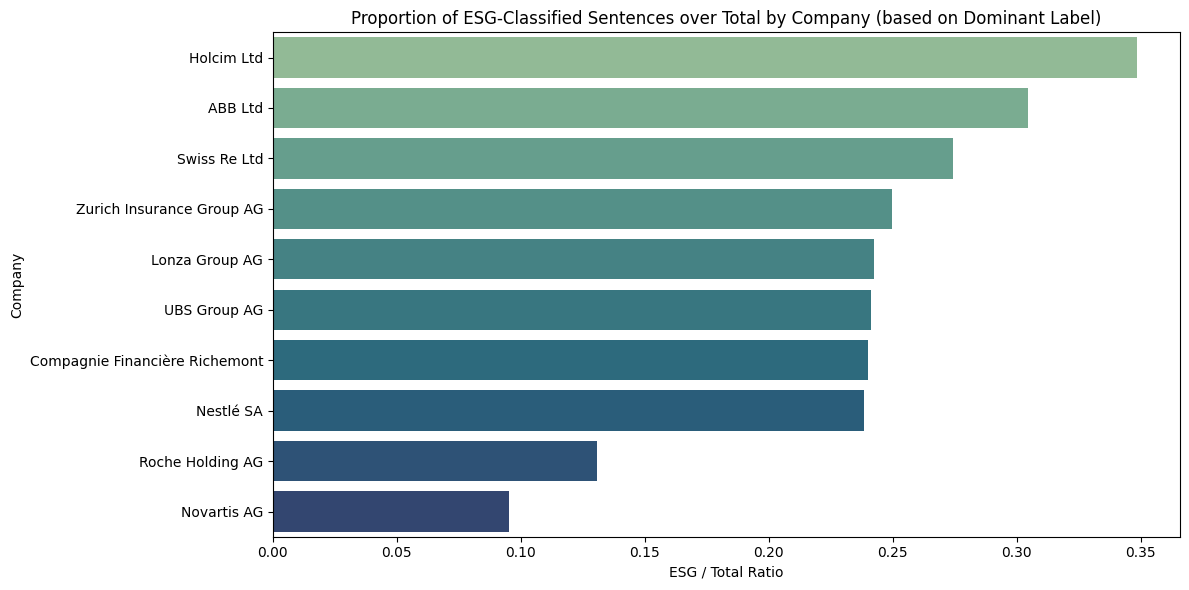

,total_phrases_all,total_esg,ratio_all_esg_on_total,ratio_E_on_total,ratio_S_on_total,ratio_G_on_total
company,,,,,,
Holcim Ltd,17310,6030,0.348354,0.246043,0.068515,0.033795
ABB Ltd,15041,4581,0.304568,0.167675,0.113357,0.023536
Swiss Re Ltd,24663,6763,0.274216,0.161173,0.082958,0.030086
Zurich Insurance Group AG,19946,4983,0.249825,0.125138,0.085832,0.038855
Lonza Group AG,12699,3078,0.242381,0.097803,0.111899,0.032680
UBS Group AG,31217,7523,0.240990,0.123554,0.083352,0.034084
Compagnie Financière Richemont,17687,4244,0.239950,0.077854,0.134392,0.027704
Nestlé SA,24927,5943,0.238416,0.109119,0.115979,0.013319
Roche Holding AG,14944,1951,0.130554,0.034194,0.082843,0.013517


In [ ]:
# 3bisbisbis. ADDITIONAL ANALYSIS ON ESG / TOTAL RATIOS (label_dominant)

# ✅ Compute total number of sentences (all types including "none") per company
total_sentences = df.groupby("company").size().rename("total_phrases_all")

# ✅ Keep only ESG-classified sentences according to label_dominant
df_esg_dominant = df[df["label_dominant"].isin(["environmental", "social", "governance"])].copy()

# ✅ Convert labels to simple categories
def dominant_to_letter(label):
    if label == "environmental":
        return "E"
    elif label == "social":
        return "S"
    elif label == "governance":
        return "G"
    else:
        return "none"

df_esg_dominant["classification_type_dominant"] = df_esg_dominant["label_dominant"].apply(dominant_to_letter)

# ✅ Count ESG-classified sentences by company and type
count_by_company = df_esg_dominant.groupby(["company", "classification_type_dominant"]).size().unstack(fill_value=0)

# ✅ Ensure all ESG columns exist
for col in ["E", "S", "G"]:
    if col not in count_by_company.columns:
        count_by_company[col] = 0

# ✅ Compute total ESG-classified sentences
count_by_company["total_esg"] = count_by_company[["E", "S", "G"]].sum(axis=1)

# ✅ Merge with total sentence count (all types including "none")
count_by_company = count_by_company.merge(total_sentences, on="company")

# ✅ Compute ESG type ratios over ESG total
for cat in ["E", "S", "G"]:
    count_by_company[f"ratio_{cat}_on_esg"] = count_by_company[cat] / count_by_company["total_esg"]

# ✅ Compute ESG type ratios over all sentences
for cat in ["E", "S", "G"]:
    count_by_company[f"ratio_{cat}_on_total"] = count_by_company[cat] / count_by_company["total_phrases_all"]

# ✅ Compute global ESG ratio on all sentences
count_by_company["ratio_all_esg_on_total"] = count_by_company["total_esg"] / count_by_company["total_phrases_all"]

# ✅ Visualization: Companies talking the most about ESG (based on dominant label, all scores)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=count_by_company.sort_values("ratio_all_esg_on_total", ascending=False),
    x="ratio_all_esg_on_total",
    y="company",
    palette="crest"
)
plt.title("Proportion of ESG-Classified Sentences over Total by Company (based on Dominant Label)")
plt.xlabel("ESG / Total Ratio")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# 👉 Optional: Table preview
count_by_company[[
    "total_phrases_all", "total_esg", "ratio_all_esg_on_total",
    "ratio_E_on_total", "ratio_S_on_total", "ratio_G_on_total"
]].sort_values("ratio_all_esg_on_total", ascending=False).head(10)


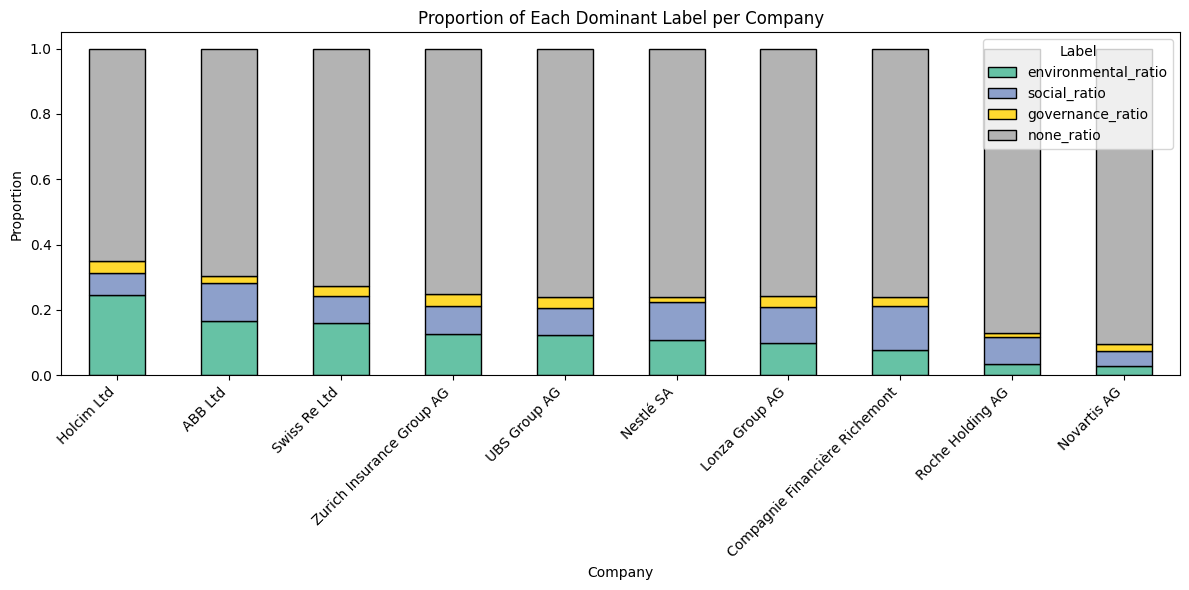

In [ ]:
# Proportion by company
pivot_label = df.pivot_table(index="company", columns="label_dominant", aggfunc="size", fill_value=0)
pivot_label["total"] = pivot_label.sum(axis=1)

# Ratios by company
for col in ["environmental", "social", "governance", "none"]:
    pivot_label[f"{col}_ratio"] = pivot_label[col] / pivot_label["total"]

# Stacked bar visualization
pivot_ratio = pivot_label[[f"{col}_ratio" for col in ["environmental", "social", "governance", "none"]]]
pivot_ratio.sort_values("environmental_ratio", ascending=False).plot(
    kind="bar", stacked=True, figsize=(12, 6), colormap="Set2", edgecolor="black"
)
plt.title("Proportion of Each Dominant Label per Company")
plt.ylabel("Proportion")
plt.xlabel("Company")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


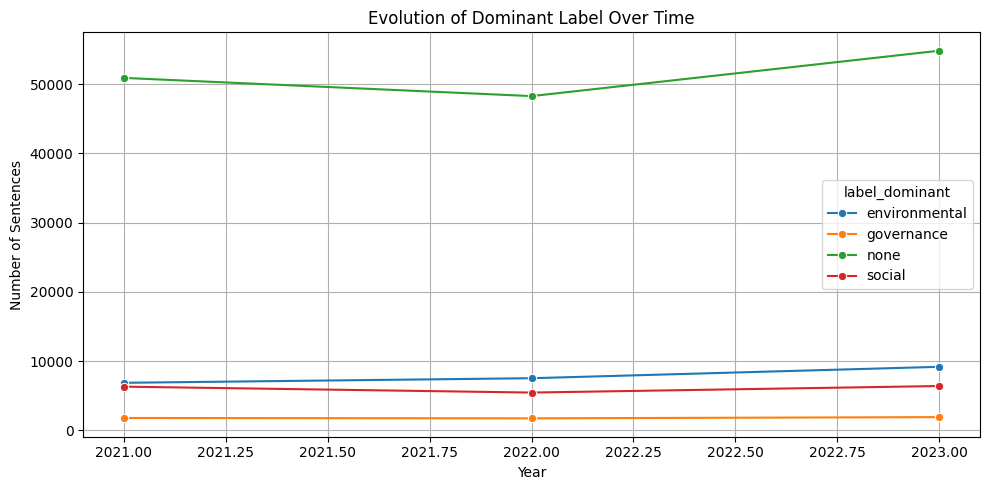

In [ ]:
# Grouping by year
dominant_over_time = df.groupby(["year", "label_dominant"]).size().reset_index(name="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data=dominant_over_time, x="year", y="count", hue="label_dominant", marker="o")
plt.title("Evolution of Dominant Label Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()
